## Resonate-and-fire model

Resonate-and-fire model is a spiking model, similar to integrate-and-fire model. However, with complex variable $z = x + iy \in \mathbb{C}$, resonate-and-fire model can generate more patterns like subthreshold oscillations, while maintain a low computational cost.

In [1]:
import brainpy as bp
import bpmodels
import brainpy.numpy as np
import matplotlib.pyplot as plt

In [2]:
print("version：", bp.__version__)
# set global params
dt = 0.002  # update variables per <dt> ms
duration = 20.  # simulate duration
bp.profile.set(backend="numba", dt=dt, merge_steps=True, show_code=False)

version： 0.2.5


Import resonate-and-fire neuron model from bpmodels package. Build and simulate a group of resonate-and-fire neuron.

In [3]:
# define neuron type
RF_neuron = bpmodels.neurons.get_ResonateandFire()

# build neuron group
neu = bp.NeuGroup(RF_neuron, geometry=(10,), monitors=['x', 'V', 'spike'])
neu.runner.set_schedule(['input', 'update', 'monitor', 'reset'])

# create input
current = bp.inputs.spike_current([0.1],
                                  bp.profile._dt, 1.5, duration=duration)

# simulate
neu.run(duration=duration, inputs=["ST.input", current], report=True)
# simulate for <duration> ms. Give external input = current

Compilation used 0.3962 s.
Start running ...
Run 10.0% used 0.001 s.
Run 20.0% used 0.003 s.
Run 30.0% used 0.004 s.
Run 40.0% used 0.005 s.
Run 50.0% used 0.006 s.
Run 60.0% used 0.008 s.
Run 70.0% used 0.009 s.
Run 80.0% used 0.010 s.
Run 90.0% used 0.012 s.
Run 100.0% used 0.013 s.
Simulation is done in 0.013 s.


Paint V-x plot and V-t during the simulation in neurons. You can see subthreshold oscillations after the first spike.

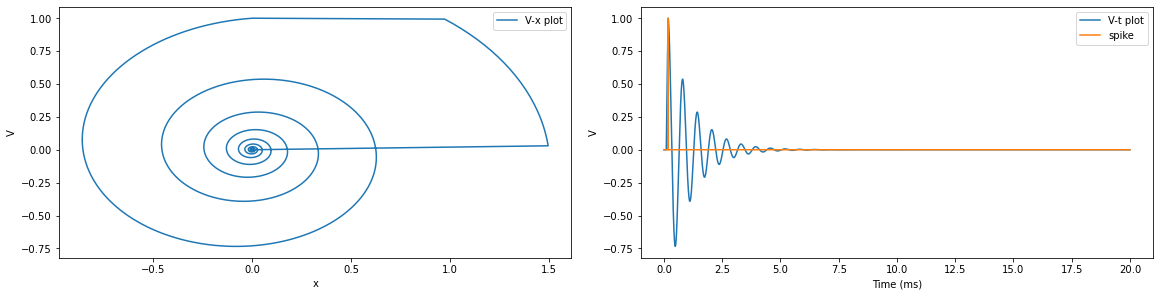

In [4]:
# paint
ts = neu.mon.ts
fig, gs = bp.visualize.get_figure(1, 2, 4, 8)
fig.add_subplot(gs[0, 0])
plt.plot(neu.mon.x[:, 0], neu.mon.V[:, 0], label = "V-x plot")
plt.xlabel('x')
plt.ylabel('V')
plt.legend()

fig.add_subplot(gs[0, 1])
plt.plot(ts, neu.mon.V[:, 0], label = "V-t plot")
plt.plot(ts, neu.mon.spike[:, 0], label = "spike")
plt.xlabel('Time (ms)')
plt.ylabel('V')
plt.legend()
plt.show()